In this notebook we will build a classification model using DecisionTrees and Random forest classifier from python's scikit learn library

## Table of contents
1. Data Loading
2. Data Exploration
3. Visualization
4. Preprocessing
5. Decision Trees and hyperparameter analysis 
5. Random Forest
6. Model comparision using ROC curve

## Loading Data

In this section we will import all the necessary packages and load the datasets we plan to work on. We will use the 
<a href='https://www.kaggle.com/jessemostipak/hotel-booking-demand'> Hotel booking data </a> and build a model to determine which customers will cancel their hotel booking

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import *
from matplotlib.legend_handler import HandlerLine2D
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score
from sklearn.metrics import confusion_matrix,auc,roc_auc_score,roc_curve
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load the data
# file_path = 'C:\Users\Tejal\Documents\Tejal\WWC-siliconvalley\hotel_bookings.csv'
file_path='https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-02-11/hotels.csv'
# https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-02-11/hotels.csv
df = pd.read_csv(file_path)

## Explore the dataset

Understanding the data, its features and distribution is a major part of builiding ML models. 

In [4]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [5]:
# Data has 119390 rows (data points) and 32 columns (features)
df.shape   

(119390, 32)

In [6]:
# Check the datatype of features
df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

In [7]:
# Feature list 
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [8]:
# Check for null values
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', ascending=False,inplace=True)
missing_value_df

,column_name,percent_missing
company,company,94.306893
agent,agent,13.686238
country,country,0.408744
children,children,0.003350
reserved_room_type,reserved_room_type,0.000000
assigned_room_type,assigned_room_type,0.000000
booking_changes,booking_changes,0.000000
deposit_type,deposit_type,0.000000
hotel,hotel,0.000000
previous_cancellations,previous_cancellations,0.000000


Company, agent, country and children have null values. There are multiple techniques for imputing null value but for simplicity we impute them with 0. As company has a very high null value percentage we will drop the column

In [9]:
# Let us create a copy of dataframe for backup and impute null with 0
backup_df=df.copy
df = df.drop('company',axis=1)
df=df.fillna(0)

In [10]:
# The df has no Null values
(df['agent'].isnull().sum()/len(df)) * 100

0.0

## Data Visualization

In this task, our target variable is is_cancelled which indicates if the booking was cancelled. 1 --> canceled, 0 --> Not canceled 

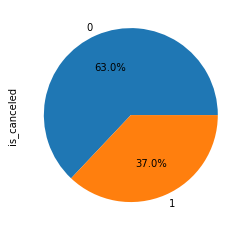

In [11]:
df['is_canceled'].value_counts().plot(kind='pie',autopct='%1.1f%%')

37% customers have cancelled their bookings. we see that our data in imbalanced

In [12]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

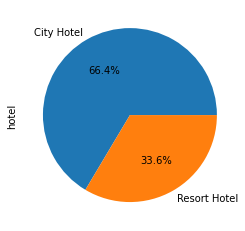

In [13]:
# Hotel feature count and distribution across 0 and 1 class 
df['hotel'].value_counts().plot(kind='pie',autopct='%1.1f%%')

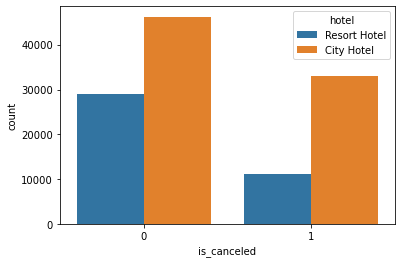

In [14]:
sns.countplot(x='is_canceled',hue='hotel',data=df)

As data has higher city hotel reservation data points compared to resort, above observation is on par with  same trend

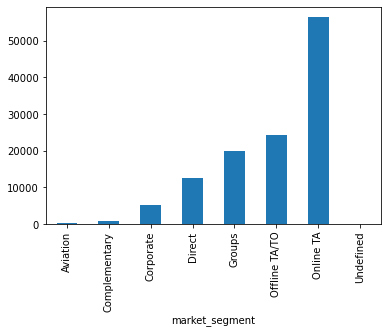

In [15]:
#market segments
df.groupby(['market_segment'])['is_canceled'].count().plot(kind='bar')

## Feature Engineering

1. Derive new features using existing features
2. Remove irrelevant features
3. Transform existing features
4. Encoding categorical variables

In [16]:
# Split data into train validation & test set in train:val:test=60:20:20 size
# We are splitting the data into 3 chunks as we will be tuning many hyperparameters in this notebook
train, val_test = train_test_split(df, test_size=0.4, random_state = 42)
val, test = train_test_split(val_test, test_size=0.5, random_state = 42)

In [17]:
train.shape

(71634, 31)

In [18]:
test.shape

(23878, 31)

In [19]:
val.shape

(23878, 31)

In [20]:
#Let us add weekend stay and weekday stay days to get total days of stay
train['total_days'] = train['stays_in_week_nights'] + train['stays_in_weekend_nights']
test['total_days'] = test['stays_in_week_nights'] + test['stays_in_weekend_nights']
val['total_days'] = val['stays_in_week_nights'] + val['stays_in_weekend_nights']

# drop the weekend stay and weekday stay days features
train = train.drop('stays_in_week_nights',axis=1).drop('stays_in_weekend_nights',axis=1)
test = test.drop('stays_in_week_nights',axis=1).drop('stays_in_weekend_nights',axis=1)
val = val.drop('stays_in_week_nights',axis=1).drop('stays_in_weekend_nights',axis=1)

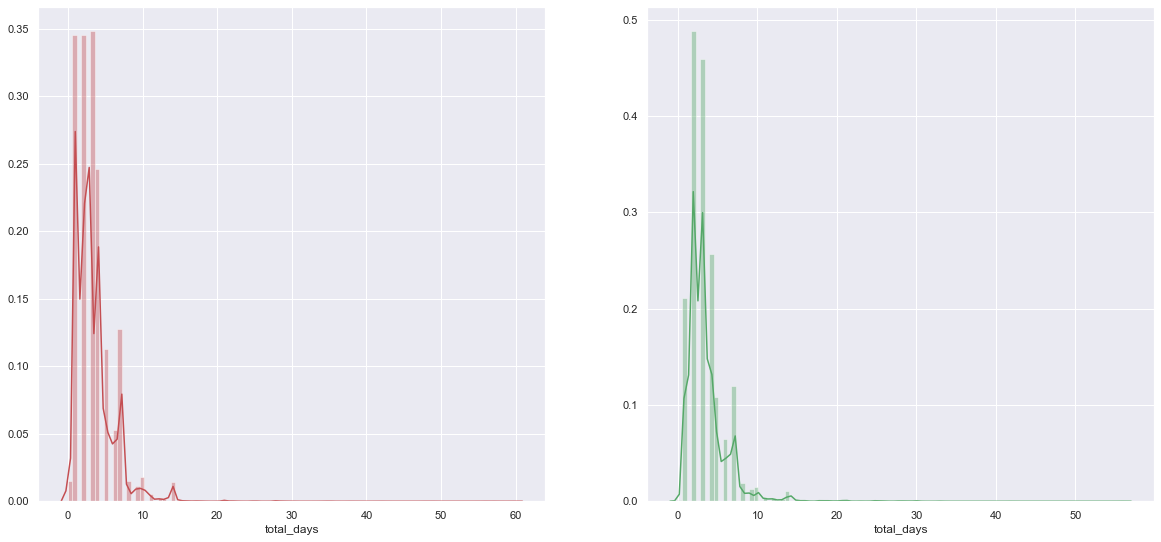

In [21]:
train_0=train[(train['is_canceled']==0)]
train_1=train[train['is_canceled']==1]
sns.set(rc={"figure.figsize": (20, 20)})
subplot(2,2,1)
ax = sns.distplot(train_0['total_days'], bins=100, color='r')
subplot(2,2,2)
ax=sns.distplot(train_1['total_days'], bins=100, color='g')

In [22]:
#Total customers
train['total_customers'] = train['adults'] + train['children']+train['babies']
test['total_customers'] = test['adults'] + test['children']+test['babies']
val['total_customers'] = val['adults'] + val['children']+val['babies']


train = train.drop('adults',axis=1).drop('children',axis=1).drop('babies',axis=1)
test = test.drop('adults',axis=1).drop('children',axis=1).drop('babies',axis=1)
val = val.drop('adults',axis=1).drop('children',axis=1).drop('babies',axis=1)

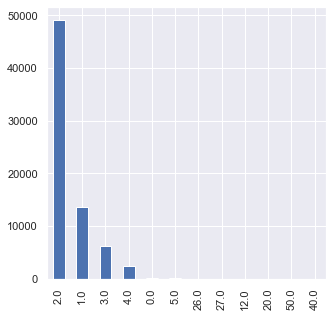

In [23]:
train['total_customers'].value_counts().plot(kind='bar',figsize=(5,5)) 

In [24]:
train = train.drop(['reservation_status_date'],axis=1)
test = test.drop(['reservation_status_date'],axis=1)
val = val.drop(['reservation_status_date'],axis=1)

In [25]:
print (len(train['agent'].unique())) # 309 unique values - Large number of unique agents and it is categorical, difficult to encode
train = train.drop('agent',axis=1)
test = test.drop('agent',axis=1)
val = val.drop('agent',axis=1)

309


In [26]:
print(len(train['country'].unique())) # 160 countries
train = train.drop('country',axis=1)
test = test.drop('country',axis=1)
val = val.drop('country',axis=1)

160


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fab1b847090>]],
      dtype=object)

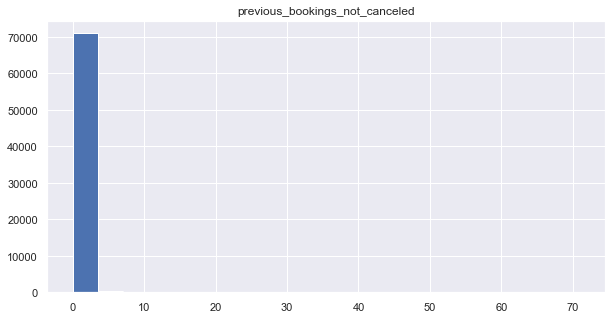

In [27]:
train.hist(column='previous_bookings_not_canceled',bins=20,figsize=(10,5))

In [28]:
#train['previous_bookings_not_canceled'].value_counts() # We observe that most data has value = 0; hence we drop the feature
#train.groupby(['is_canceled'])['previous_bookings_not_canceled'].value_counts() # We observe that data distribution across both class is remains same
train = train.drop('previous_bookings_not_canceled',axis=1)
test = test.drop('previous_bookings_not_canceled',axis=1)
val = val.drop('previous_bookings_not_canceled',axis=1)

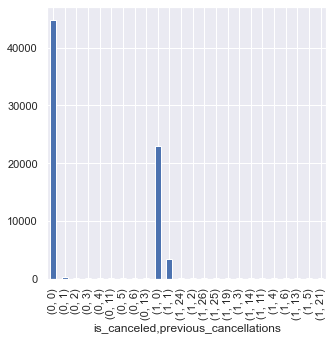

In [29]:
train.groupby(['is_canceled'])['previous_cancellations'].value_counts().plot(kind='bar',figsize=(5,5))
# We observe that most data has value = 0; and trend remains same across the 2 classes
train = train.drop('previous_cancellations',axis=1)
test = test.drop('previous_cancellations',axis=1)
val = val.drop('previous_cancellations',axis=1)

In [30]:
len(train.columns)

23

## Feature Correlation

In [31]:
backup_train = train.copy()
backup_test = test.copy()
backup_val = val.copy()

In [32]:
#Custom encoding
train['arrival_date_month'] = train['arrival_date_month'].map({'January':1, 'February': 2, 'March':3, \
                                                         'April':4, 'May':5, 'June':6, 'July':7,\
                                                         'August':8, 'September':9, 'October':10, \
                                                         'November':11, 'December':12})

In [33]:
encode = LabelEncoder()

In [34]:
train.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'meal', 'market_segment',
       'distribution_channel', 'is_repeated_guest', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'total_days', 'total_customers'],
      dtype='object')

In [35]:
train['market_segment'].unique()

array(['Offline TA/TO', 'Groups', 'Direct', 'Corporate', 'Online TA',
       'Aviation', 'Complementary', 'Undefined'], dtype=object)

In [36]:
cat_col=['hotel','arrival_date_year','meal','market_segment','distribution_channel','reserved_room_type', 'assigned_room_type',\
        'deposit_type','customer_type','reservation_status']
for i in cat_col:
    train[i] = encode.fit_transform(train[i])

In [37]:
train['market_segment'].unique()

array([5, 4, 3, 2, 6, 0, 1, 7])

In [38]:
# train.head()
train.dtypes

hotel                            int64
is_canceled                      int64
lead_time                        int64
arrival_date_year                int64
arrival_date_month               int64
arrival_date_week_number         int64
arrival_date_day_of_month        int64
meal                             int64
market_segment                   int64
distribution_channel             int64
is_repeated_guest                int64
reserved_room_type               int64
assigned_room_type               int64
booking_changes                  int64
deposit_type                     int64
days_in_waiting_list             int64
customer_type                    int64
adr                            float64
required_car_parking_spaces      int64
total_of_special_requests        int64
reservation_status               int64
total_days                       int64
total_customers                float64
dtype: object

### Feature correlation
<b>Spearman</b> and <b>Pearson</b> are the 2 statistical methods to compute the correlation between features. 
- Pearson is suggested method for features with continuous values and linear relationship
- Spearman is suggested method when features have ordinal categorical data or non-linear relationship
<br>Pandas correlation method by default uses Pearson method, but we can also change it to spearman </br>

In [39]:
train.corr()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,meal,market_segment,distribution_channel,...,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,total_days,total_customers
hotel,1.000000,-0.133235,-0.075315,-0.037106,-0.005104,-0.004476,0.001585,-0.008411,-0.084212,-0.175068,...,0.070126,-0.153706,-0.071511,-0.047776,-0.097952,0.216508,0.043603,0.122146,0.243479,0.041462
is_canceled,-0.133235,1.000000,0.293862,0.018617,0.007202,0.004231,-0.005907,-0.015696,0.057009,0.165857,...,-0.142468,0.465365,0.053578,-0.066124,0.046497,-0.194981,-0.237227,-0.916236,0.020323,0.050378
lead_time,-0.075315,0.293862,1.000000,0.037441,0.130301,0.125686,0.002624,0.003362,0.012947,0.221581,...,0.005715,0.376117,0.170758,0.074105,-0.060141,-0.116603,-0.097238,-0.303482,0.156666,0.076353
arrival_date_year,-0.037106,0.018617,0.037441,1.000000,-0.527453,-0.539995,0.003309,0.065659,0.109768,0.023996,...,0.027568,-0.064395,-0.058757,-0.002255,0.190687,-0.019273,0.110611,-0.018078,0.028608,0.047847
arrival_date_month,-0.005104,0.007202,0.130301,-0.527453,1.000000,0.995089,-0.027029,-0.012381,0.002234,0.008046,...,0.005375,0.000728,0.020778,-0.031787,0.078292,0.000966,0.028711,-0.018452,0.018921,0.029172
arrival_date_week_number,-0.004476,0.004231,0.125686,-0.539995,0.995089,1.000000,0.066024,-0.014768,0.000203,0.006080,...,0.006360,0.000589,0.024521,-0.030274,0.074937,0.003083,0.026953,-0.014659,0.016151,0.027057
arrival_date_day_of_month,0.001585,-0.005907,0.002624,0.003309,-0.027029,0.066024,1.000000,-0.007767,-0.004260,0.000526,...,0.013321,-0.000918,0.021398,0.013863,0.029335,0.011258,0.005377,0.011239,-0.028335,0.005292
meal,-0.008411,-0.015696,0.003362,0.065659,-0.012381,-0.014768,-0.007767,1.000000,0.145500,0.117021,...,0.019491,-0.090786,-0.007059,0.046040,0.057454,-0.040283,0.025588,0.012886,0.043300,-0.007353
market_segment,-0.084212,0.057009,0.012947,0.109768,0.002234,0.000203,-0.004260,0.145500,1.000000,0.767888,...,-0.072359,-0.185796,-0.043706,-0.166866,0.229562,-0.066557,0.271409,-0.058667,0.127563,0.206631
distribution_channel,-0.175068,0.165857,0.221581,0.023996,0.008046,0.006080,0.000526,0.117021,0.767888,1.000000,...,-0.114508,0.087917,0.048106,-0.069046,0.094111,-0.136533,0.096475,-0.168729,0.101435,0.140565


In [40]:
feat_corr = train.corr()
feat_corr['is_repeated_guest'].sort_values()

distribution_channel          -0.262067
market_segment                -0.251488
total_customers               -0.134782
adr                           -0.134671
lead_time                     -0.125273
total_days                    -0.107610
is_canceled                   -0.086414
deposit_type                  -0.056997
meal                          -0.056160
arrival_date_month            -0.029176
arrival_date_week_number      -0.028701
reserved_room_type            -0.027408
days_in_waiting_list          -0.022707
customer_type                 -0.015767
arrival_date_day_of_month     -0.008097
arrival_date_year              0.008644
total_of_special_requests      0.010448
booking_changes                0.014864
assigned_room_type             0.037547
hotel                          0.052696
required_car_parking_spaces    0.080383
reservation_status             0.084314
is_repeated_guest              1.000000
Name: is_repeated_guest, dtype: float64

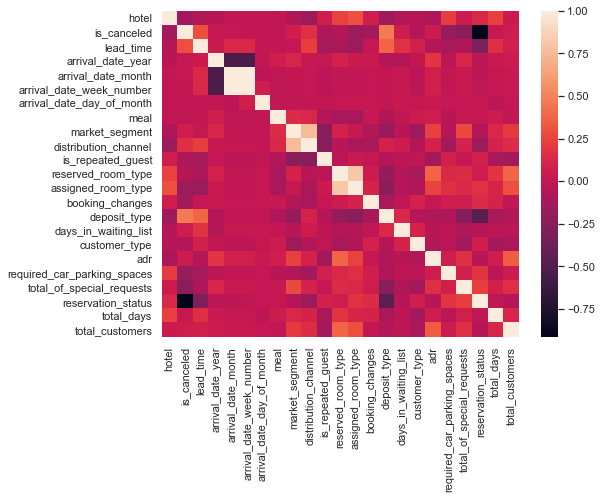

In [41]:
plt.figure(figsize=(8,6))
sns.heatmap(feat_corr)

The diagonal shows correlation of each feature with itself, hence indicates highest correlation.
Using the table and plot we observe that few features have veryhigh correlation
Ex:- 
1. Arrival_date_week_number and arrival_date_month = 0.99
2. reserved_room_type vs assigned_room_type = 0.81

In [42]:
feat_corr['is_canceled'].sort_values()

reservation_status            -0.916236
total_of_special_requests     -0.237227
required_car_parking_spaces   -0.194981
assigned_room_type            -0.173262
booking_changes               -0.142468
hotel                         -0.133235
is_repeated_guest             -0.086414
customer_type                 -0.066124
reserved_room_type            -0.059401
meal                          -0.015696
arrival_date_day_of_month     -0.005907
arrival_date_week_number       0.004231
arrival_date_month             0.007202
arrival_date_year              0.018617
total_days                     0.020323
adr                            0.046497
total_customers                0.050378
days_in_waiting_list           0.053578
market_segment                 0.057009
distribution_channel           0.165857
lead_time                      0.293862
deposit_type                   0.465365
is_canceled                    1.000000
Name: is_canceled, dtype: float64

The reservation_status has high correlation with is_canceled. In Naive Bayes session, we saw that removing the reservation_status feature caused the model performance to drop considerably. Lets see how it affects Trees

## Implementing Decision Tree

There are various decision tree algorithms like - ID3, C4.5, C5.0 and CART. Scikit learn implements optimized version of CART alogrithm. We have multiple hyperparameters in decision tree, <a href="https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html">sklearn documentation</a> 
<br> <br>
We will try to see the effect of following hyperparameters on modelling -
1. criterion -{gini and entropy}
2. max_depth
3. class_weight

### Model 1 -
Default hyperparaments -- Gini criterion, no class weight and no pruning

In [43]:
y_train = backup_train["is_canceled"]
X_train = backup_train.drop(["is_canceled"], axis=1)
y_val = backup_val["is_canceled"]
X_val = backup_val.drop(["is_canceled"], axis=1)

<b>Encoding categorical features

Scikit's Decision tree and Random Forest implementations cannot handle string values so we need to encode the categorical values to convert them to numeric value. However, few other languages like R, Spark and Weka have Decision trees that can handle string feature values <br><br>
We use one-hot encoding instead of label encoder to avoid the illusion of continuous values for categorical features

In [44]:
cat_cols=['hotel','arrival_date_month','arrival_date_year','meal','market_segment','distribution_channel','reserved_room_type', 'assigned_room_type',\
        'deposit_type','customer_type','reservation_status']
X_train_enc = pd.get_dummies(data=X_train,columns=cat_cols)
X_val_enc = pd.get_dummies(data=X_val,columns=cat_cols)
X_train_enc,X_val_enc =X_train_enc.align(X_val_enc, join='left', axis=1)
X_val_enc=X_val_enc.fillna(0)

In [45]:
X_train_enc.head()

,lead_time,arrival_date_week_number,arrival_date_day_of_month,is_repeated_guest,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,total_days,...,deposit_type_No Deposit,deposit_type_Non Refund,deposit_type_Refundable,customer_type_Contract,customer_type_Group,customer_type_Transient,customer_type_Transient-Party,reservation_status_Canceled,reservation_status_Check-Out,reservation_status_No-Show
71397,465,27,4,0,0,0,90.0,0,0,1,...,0,1,0,0,0,1,0,1,0,0
52819,69,25,12,0,0,0,120.0,0,0,6,...,0,1,0,0,0,1,0,1,0,0
75267,299,33,12,0,0,0,62.0,0,0,2,...,0,1,0,0,0,0,1,1,0,0
40803,36,32,7,0,0,0,62.0,0,0,2,...,1,0,0,0,0,0,1,0,1,0
4784,169,14,31,0,1,0,60.0,0,0,4,...,0,0,1,0,0,0,1,0,1,0


In [46]:
clf = DecisionTreeClassifier(random_state = 0)
clf.fit(X_train_enc, y_train)

DecisionTreeClassifier(random_state=0)

In [47]:
y_pred = clf.predict(X_val_enc)
y_prob = clf.predict_proba(X_val_enc)

In [48]:
y_pred[:10]

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1])

## Evaluation metric

<b> Precission and Recall </b>

<img src="img/PR diagram1.PNG" width="200p"/>

<img src="img/PR diagram 2.PNG" width="400"/>

<br><b> Confusion Matrix </b>

<img src="img/Confusion matrix.PNG" width="200"/>

In [49]:
print('test-set confusion matrix:\n', confusion_matrix(y_val,y_pred)) 
print("recall score: ", recall_score(y_val,y_pred))
print("precision score: ", precision_score(y_val,y_pred))
print("f1 score: ", f1_score(y_val,y_pred))
print("accuracy score: ", accuracy_score(y_val,y_pred))

test-set confusion matrix:
 [[15071     0]
 [    0  8807]]
recall score:  1.0
precision score:  1.0
f1 score:  1.0
accuracy score:  1.0


Feature Importance

In [50]:
d = pd.DataFrame(
    {'Features': list(X_train_enc.columns),
     'Importance': clf.feature_importances_
    })
d.sort_values(by=['Importance'],ascending=False)[:5]

,Features,Importance
75,reservation_status_Check-Out,1.0
0,lead_time,0.0
48,reserved_room_type_C,0.0
55,reserved_room_type_P,0.0
54,reserved_room_type_L,0.0


The model performance is perfect but only 1 feature has been used in the model, hence we should remove that feature to avoid data leak

### Model 2 - 
Remove the feature that is highly correlated with target feature
<br>
<b>Reservation_status</b> has high correlation with is_canceled. Looking at the values in column reveals that canceled is a reservation type. This might be causing data leak. Hence we will delete this feature and train with default hyperparameters

In [51]:
df['reservation_status'].unique()

array(['Check-Out', 'Canceled', 'No-Show'], dtype=object)

In [52]:
X_train = X_train.drop('reservation_status',axis=1)
X_val = X_val.drop('reservation_status',axis=1)

In [53]:
cat_cols=['hotel','arrival_date_month','arrival_date_year','meal','market_segment','distribution_channel','reserved_room_type', 'assigned_room_type',\
        'deposit_type','customer_type']
X_train_enc = pd.get_dummies(data=X_train,columns=cat_cols,drop_first=True)
X_val_enc = pd.get_dummies(data=X_val,columns=cat_cols,drop_first=True)
X_train_enc,X_val_enc =X_train_enc.align(X_val_enc, join='left', axis=1)
X_val_enc=X_val_enc.fillna(0)

In [54]:
clf2 = DecisionTreeClassifier(random_state = 0)
clf2.fit(X_train_enc, y_train)

DecisionTreeClassifier(random_state=0)

In [55]:
y_pred2 = clf2.predict(X_val_enc)
y_prob2 = clf2.predict_proba(X_val_enc)

In [56]:
y_prob2[:10]

array([[1.        , 0.        ],
       [0.54545455, 0.45454545],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.68181818, 0.31818182],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [0.        , 1.        ],
       [0.        , 1.        ]])

In [57]:
print('test-set confusion matrix:\n', confusion_matrix(y_val,y_pred2)) 
print("recall score: ", recall_score(y_val,y_pred2))
print("precision score: ", precision_score(y_val,y_pred2))
print("f1 score: ", f1_score(y_val,y_pred2))
print("accuracy score: ", accuracy_score(y_val,y_pred2))

test-set confusion matrix:
 [[12798  2273]
 [ 2143  6664]]
recall score:  0.7566708300215738
precision score:  0.7456640930961173
f1 score:  0.7511271415689811
accuracy score:  0.8150598877627943


In [58]:
d = pd.DataFrame(
    {'Features': list(X_train_enc.columns),
     'Importance': clf2.feature_importances_
    })
d.sort_values(by=['Importance'],ascending=False)[:15]

,Features,Importance
59,deposit_type_Non Refund,0.236000
0,lead_time,0.165224
6,adr,0.121271
2,arrival_date_day_of_month,0.078097
8,total_of_special_requests,0.059481
1,arrival_date_week_number,0.056214
9,total_days,0.056021
34,market_segment_Online TA,0.029904
7,required_car_parking_spaces,0.019692
4,booking_changes,0.019241


### Model 3
Let us remove 1 feature from the correlated feature pair, We will remove the feature with lesser importance
1. Arrival_date_week_number and arrival_date_month = 0.99
2. reserved_room_type vs assigned_room_type = 0.81
3. market_segment vs distribution_channel = 0.76

In [59]:
X_train = X_train.drop('arrival_date_month',axis=1)
X_val = X_val.drop('arrival_date_month',axis=1)

X_train = X_train.drop('market_segment',axis=1)
X_val = X_val.drop('market_segment',axis=1)

X_train = X_train.drop('reserved_room_type',axis=1)
X_val = X_val.drop('reserved_room_type',axis=1)

In [60]:
X_train.dtypes

hotel                           object
lead_time                        int64
arrival_date_year                int64
arrival_date_week_number         int64
arrival_date_day_of_month        int64
meal                            object
distribution_channel            object
is_repeated_guest                int64
assigned_room_type              object
booking_changes                  int64
deposit_type                    object
days_in_waiting_list             int64
customer_type                   object
adr                            float64
required_car_parking_spaces      int64
total_of_special_requests        int64
total_days                       int64
total_customers                float64
dtype: object

In [61]:
cat_cols=['hotel','arrival_date_year','meal','distribution_channel','assigned_room_type',\
        'deposit_type','customer_type']
X_train_enc = pd.get_dummies(data=X_train,columns=cat_cols,drop_first=True)
X_val_enc = pd.get_dummies(data=X_val,columns=cat_cols,drop_first=True)
X_train_enc,X_val_enc =X_train_enc.align(X_val_enc, join='left', axis=1)
X_val_enc=X_val_enc.fillna(0)

In [62]:
clf3 = DecisionTreeClassifier(random_state = 0)
clf3.fit(X_train_enc, y_train)
y_pred3=clf3.predict(X_val_enc)
print("f1 score: ", f1_score(y_val,y_pred3))

f1 score:  0.7402766017499293


#### Training metric

In [63]:
y_pred3_train = clf3.predict(X_train_enc)
print('test-set confusion matrix:\n', confusion_matrix(y_train,y_pred3_train)) 
print("f1 score: ", f1_score(y_train,y_pred3_train))
print("accuracy score: ", accuracy_score(y_train,y_pred3_train))

test-set confusion matrix:
 [[45023   154]
 [  408 26049]]
f1 score:  0.9893277630079758
accuracy score:  0.9921545634754446


We see that the model has very low training error but considerably high test error. This indicates that the model is overfitted. 

In [64]:
d = pd.DataFrame(
    {'Features': list(X_train_enc.columns),
     'Importance': clf3.feature_importances_
    })
d.sort_values(by=['Importance'],ascending=False)[:15]

,Features,Importance
32,deposit_type_Non Refund,0.236128
0,lead_time,0.164261
6,adr,0.135594
2,arrival_date_day_of_month,0.089125
1,arrival_date_week_number,0.077989
9,total_days,0.054798
8,total_of_special_requests,0.031328
4,booking_changes,0.026815
7,required_car_parking_spaces,0.020517
10,total_customers,0.019675


### Model 4 - 
$Gini Impurity= \sum_{k=1}^{c} (P_k)*(1-P_k)$ <br><br>
$Entropy = \sum_{k=1}^{c}-P_k*log_2(P_k)$

<img src="img/Impurity criterion.PNG" width="400"/>
We see that both criterion follow same curve indicating that there is no significant difference between the two.

In [65]:
y_train = backup_train["is_canceled"]
X_train = backup_train.drop(["is_canceled"], axis=1).drop(["reservation_status"],axis=1)
y_val = backup_val["is_canceled"]
X_val = backup_val.drop(["is_canceled"], axis=1).drop(["reservation_status"],axis=1)

In [66]:
cat_cols=['hotel','arrival_date_month','arrival_date_year','meal','market_segment','distribution_channel','reserved_room_type', 'assigned_room_type',\
        'deposit_type','customer_type']
X_train_enc = pd.get_dummies(data=X_train,columns=cat_cols,drop_first=True)
X_val_enc = pd.get_dummies(data=X_val,columns=cat_cols,drop_first=True)
X_train_enc,X_val_enc =X_train_enc.align(X_val_enc, join='left', axis=1)
X_val_enc=X_val_enc.fillna(0)

In [67]:
clf4 = DecisionTreeClassifier(criterion="entropy",random_state = 0)
clf4.fit(X_train_enc, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [68]:
y_pred4 = clf4.predict(X_val_enc)
y_prob4 = clf4.predict_proba(X_val_enc)
print("f1 score: ", f1_score(y_val,y_pred4))

f1 score:  0.7488290728514192


Impurity criterion did not affect our model performance. The feature importance of the 2 models also look similar 

In [69]:
d = pd.DataFrame(
    {'Features': list(X_train_enc.columns),
     'Clf2_Importance': clf2.feature_importances_,
     'Clf4_Importance': clf4.feature_importances_

    })
d.sort_values(by=['Clf4_Importance'],ascending=False)[:15]

,Features,Clf2_Importance,Clf4_Importance
59,deposit_type_Non Refund,0.236000,0.202150
0,lead_time,0.165224,0.168321
6,adr,0.121271,0.130958
2,arrival_date_day_of_month,0.078097,0.087758
1,arrival_date_week_number,0.056214,0.064475
9,total_days,0.056021,0.055221
8,total_of_special_requests,0.059481,0.046154
7,required_car_parking_spaces,0.019692,0.033785
34,market_segment_Online TA,0.029904,0.025994
10,total_customers,0.018155,0.017477


### Model 5 -
Pruning the model to avoid overfitting <br>
We have multiple hyperparameters such as max_depth, min_sample_split etc which can be tuned to prune the model. 

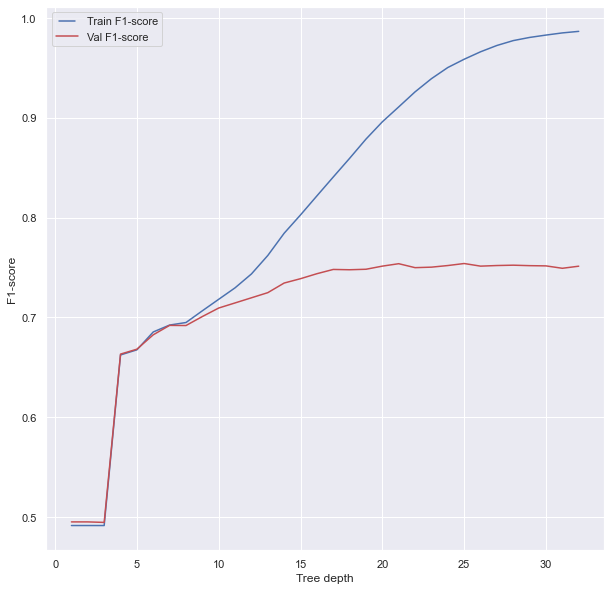

In [70]:
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
   clf5 = DecisionTreeClassifier(max_depth=max_depth)
   clf5.fit(X_train_enc, y_train)
   train_pred = clf5.predict(X_train_enc)
   f1_score1 = f1_score(y_train,train_pred)
   train_results.append(f1_score1)

   y_pred = clf5.predict(X_val_enc)
   f1_score1 = f1_score(y_val,y_pred)
   test_results.append(f1_score1)
    
plt.figure(figsize=(10,10))
line1, = plt.plot(max_depths, train_results, 'b', label="Train F1-score")
line2, = plt.plot(max_depths, test_results, 'r', label="Val F1-score")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('F1-score')
plt.xlabel('Tree depth')
plt.show()

As the tree depth increases, our training f1-score improves and we eventually get f1-score=1, however the widening gap between the test and training error curve indicates that the model is unable to generalize well on unseen data i.e. the model has overfitted

In [71]:
clf5 = DecisionTreeClassifier(criterion="gini",random_state = 0,max_depth=12)
clf5.fit(X_train_enc, y_train)
y_pred5 = clf5.predict(X_val_enc)
y_pred5_train = clf5.predict(X_train_enc)
print("Train data f1 score: ", f1_score(y_train,y_pred5_train))
print("Val data f1 score: ", f1_score(y_val,y_pred5))

Train data f1 score:  0.7436251887454542
Val data f1 score:  0.7205590101929611


### Model 6
<b> Weighted Decision tree or Cost-sensitive tree </b> <br>
Experiment with class weight. Our data is slightly imbalanced, so try to assign higher weight for positive samples versus negative samples using <b>class_weight</b> hyeperparameter. We can assign {class:weight} or “balanced”<br>

The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data as n_samples / (n_classes * np.bincount(y))
</br>

In [72]:
clf6 = DecisionTreeClassifier(criterion="gini",random_state = 0,max_depth=12,class_weight={0:1,1:2})
clf6.fit(X_train_enc, y_train)
y_pred6 = clf6.predict(X_val_enc)
y_pred6_train = clf6.predict(X_train_enc)
print("Train data f1 score: ", f1_score(y_train,y_pred6_train))
print("Val data f1 score: ", f1_score(y_val,y_pred6))

Train data f1 score:  0.7511089548100914
Val data f1 score:  0.7332743270682563


By adjusting the class_weight, our test f1 score has improved by 1.3%

Decision tree has many hyperparameters and we can use sklearn's <b>GridSearchCV</b> or <b>RandomizedSearchCV</b> to find the best hyperparaters. <a href="https://scikit-learn.org/stable/modules/grid_search.html">Sklearn documentation</a>

## Ensemble model - Random forest
Random forest is a ensemble of decision trees which aims to improve prediction accuracy while avoiding over fitting. <br>

In sklearn's Random forest implementation, each subsample used to fit each tree is same size as actual data but sampled using replacement if <b>bootstrap </b> hyperparameter is set to True. It has many hyperparameters similar to decision tree. <a href="https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html">sklearn documenatation </a>

In [73]:
X_train.dtypes

hotel                           object
lead_time                        int64
arrival_date_year                int64
arrival_date_month              object
arrival_date_week_number         int64
arrival_date_day_of_month        int64
meal                            object
market_segment                  object
distribution_channel            object
is_repeated_guest                int64
reserved_room_type              object
assigned_room_type              object
booking_changes                  int64
deposit_type                    object
days_in_waiting_list             int64
customer_type                   object
adr                            float64
required_car_parking_spaces      int64
total_of_special_requests        int64
total_days                       int64
total_customers                float64
dtype: object

In [74]:
y_train = backup_train["is_canceled"]
X_train = backup_train.drop(["is_canceled"], axis=1).drop(["reservation_status"],axis=1)
y_val = backup_val["is_canceled"]
X_val = backup_val.drop(["is_canceled"], axis=1).drop(["reservation_status"],axis=1)

In [75]:
cat_cols=['hotel','arrival_date_month','arrival_date_year','meal','market_segment','distribution_channel','reserved_room_type', 'assigned_room_type',\
        'deposit_type','customer_type']
X_train_enc = pd.get_dummies(data=X_train,columns=cat_cols,drop_first=True)
X_val_enc = pd.get_dummies(data=X_val,columns=cat_cols,drop_first=True)
X_train_enc,X_val_enc =X_train_enc.align(X_val_enc, join='left', axis=1)
X_val_enc=X_val_enc.fillna(0)

In [76]:
rf1=RandomForestClassifier()
rf1.fit(X_train_enc,y_train)
y_pred_rf1=rf1.predict(X_val_enc)
y_pred_rf1_train=rf1.predict(X_train_enc)

print("Train data f1 score: ", f1_score(y_train,y_pred_rf1_train))
print("Val data f1 score: ", f1_score(y_val,y_pred_rf1))

Train data f1 score:  0.9895702962035878
Val data f1 score:  0.7978075517661388


In [77]:
rf1.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

With default setting, we see that the model has better performance on test data but the training data f1 score is very high, signifying a overfitting. 

### Model 2
1. Using optimal max_depth 
2. Class_weight = "balanced_subsample" - Same as balanced but the ratio is computed for each tree based on the bootstrapped data considered

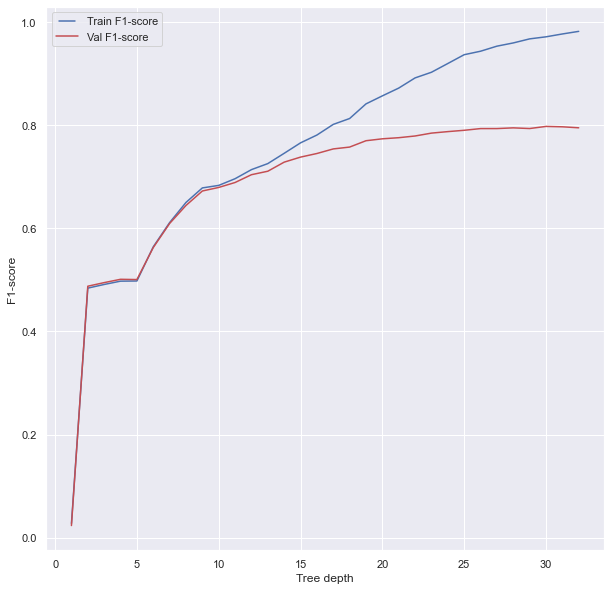

In [78]:
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
   rf2=RandomForestClassifier(max_depth=max_depth,n_estimators=30)
   rf2.fit(X_train_enc, y_train)
   train_pred = rf2.predict(X_train_enc)
   f1_score1 = f1_score(y_train,train_pred)
   train_results.append(f1_score1)

   y_pred = rf2.predict(X_val_enc)
   f1_score1 = f1_score(y_val,y_pred)
   test_results.append(f1_score1)
    
plt.figure(figsize=(10,10))
line1, = plt.plot(max_depths, train_results, 'b', label="Train F1-score")
line2, = plt.plot(max_depths, test_results, 'r', label="Val F1-score")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('F1-score')
plt.xlabel('Tree depth')
plt.show()

In [79]:
rf2=RandomForestClassifier(max_depth=15,class_weight="balanced_subsample")
rf2.fit(X_train_enc,y_train)
y_pred_rf2=rf2.predict(X_val_enc)
y_pred_rf2_train=rf2.predict(X_train_enc)

print("Train data f1 score: ", f1_score(y_train,y_pred_rf2_train))
print("Val data f1 score: ", f1_score(y_val,y_pred_rf2))

Train data f1 score:  0.8062825243637052
Val data f1 score:  0.7740595430417725


### Model 3
1. Increase number of estimators to 80; It increases the training time 

In [80]:
rf3=RandomForestClassifier(max_depth=17,class_weight="balanced_subsample",n_estimators=80)
rf3.fit(X_train_enc,y_train)
y_pred_rf3=rf3.predict(X_val_enc)
y_pred_rf3_train=rf3.predict(X_train_enc)

print("Train data f1 score: ", f1_score(y_train,y_pred_rf3_train))
print("Val data f1 score: ", f1_score(y_val,y_pred_rf3))

Train data f1 score:  0.8382551341627942
Val data f1 score:  0.7843500405139484


## ROC curve
We will compare the best versions of the 2 classifiers we have trained so far in classification session -
1. Decision tree model 
2. Random forest

Decision Tree

In [81]:
y_test = backup_test["is_canceled"]
X_test = backup_test.drop(["is_canceled"], axis=1).drop('reservation_status',axis=1)

cat_cols=['hotel','arrival_date_month','arrival_date_year','meal','market_segment','distribution_channel','reserved_room_type', 'assigned_room_type',\
        'deposit_type','customer_type']
X_test_enc = pd.get_dummies(data=X_test,columns=cat_cols,drop_first=True)
X_train_enc,X_test_enc =X_train_enc.align(X_test_enc, join='left', axis=1)
X_test_enc=X_test_enc.fillna(0)

In [82]:
y_prob6 = clf6.predict_proba(X_test_enc)
false_positive_rateDT_6, true_positive_rateDT_6, thresholdDT_6 = roc_curve(y_test, y_prob6[:,1])
roc_aucDT_6 = auc(false_positive_rateDT_6, true_positive_rateDT_6)

Random Forest

In [83]:
y_test = backup_test["is_canceled"]
X_test = backup_test.drop(["is_canceled"], axis=1).drop('reservation_status',axis=1)
cat_cols=['hotel','arrival_date_month','arrival_date_year','meal','market_segment','distribution_channel','reserved_room_type', 'assigned_room_type',\
        'deposit_type','customer_type']
X_test_enc = pd.get_dummies(data=X_test,columns=cat_cols,drop_first=True)
X_train_enc,X_test_enc =X_train_enc.align(X_test_enc, join='left', axis=1)
X_test_enc=X_test_enc.fillna(0)

In [84]:
y_prob_rf = rf3.predict_proba(X_test_enc)
false_positive_rateRF, true_positive_rateRF, thresholdRF = roc_curve(y_test, y_prob_rf[:,1])
roc_aucRF = auc(false_positive_rateRF, true_positive_rateRF)

Text(0.5, 0, 'False Positive Rate')

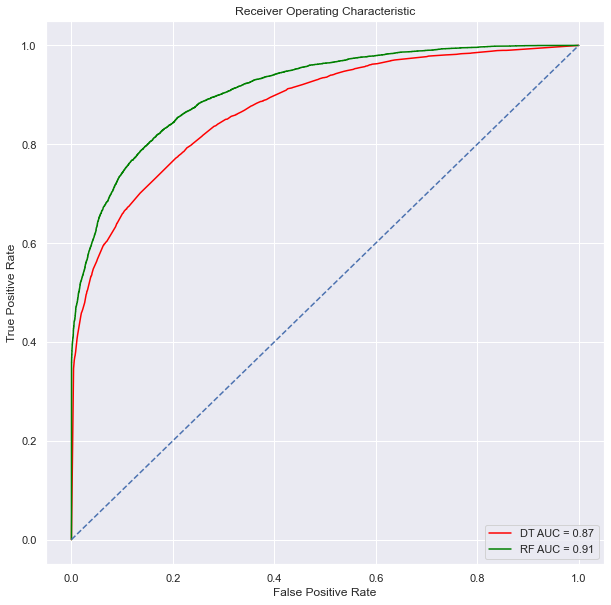

In [85]:
plt.figure(figsize = (10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rateDT_6, true_positive_rateDT_6, color = 'red', label = 'DT AUC = %0.2f' % roc_aucDT_6)
plt.plot(false_positive_rateRF, true_positive_rateRF, color = 'green', label = 'RF AUC = %0.2f' % roc_aucRF)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1], linestyle = '--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

We see that Random forest has the better performance among the 2 models